**Kmeans**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Cargar el dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# You assigned the DataFrame to 'X', not 'df'
# Change 'df.head()' to 'X.head()' to view the first 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
df.shape

(150, 4)

In [20]:
# Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [21]:
# Aplicar K-Means para hacer el agrupamiento
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)


In [22]:
X.min()

,0
sepal length (cm),4.3
sepal width (cm),2.0
petal length (cm),1.0
petal width (cm),0.1


In [23]:
X.max()

,0
sepal length (cm),7.9
sepal width (cm),4.4
petal length (cm),6.9
petal width (cm),2.5


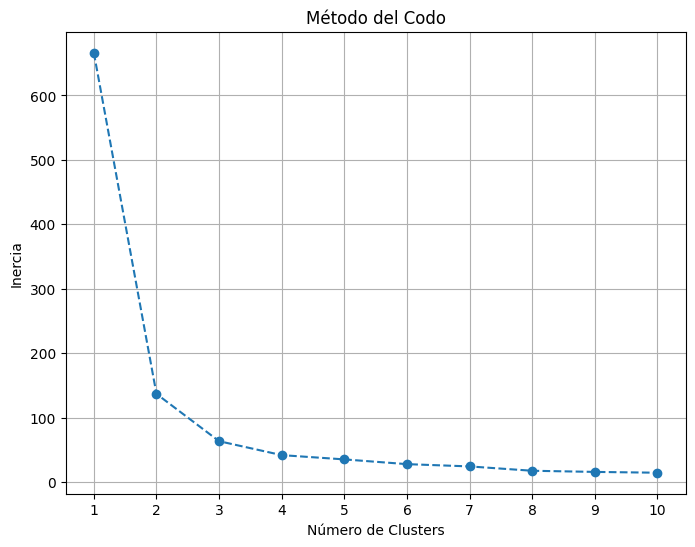

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Lista para almacenar la inercia para diferentes números de clusters
inertia = []

# Probar diferentes números de clusters, de 1 a 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [25]:
# Agregar la columna de etiquetas de grupo al DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
X_pca_df['Cluster'] = clusters



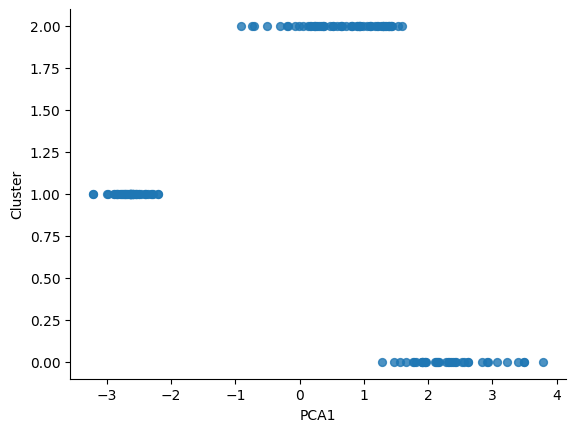

In [30]:
# Assuming X_pca_df contains your data with the 'Cluster' column
X_pca_df.plot(kind='scatter', x='PCA1', y='Cluster', s=32, alpha=.8)
# Changed x-axis to 'PCA1' as 'sepal length (cm)' is not in X_pca_df

plt.gca().spines[['top', 'right',]].set_visible(False)

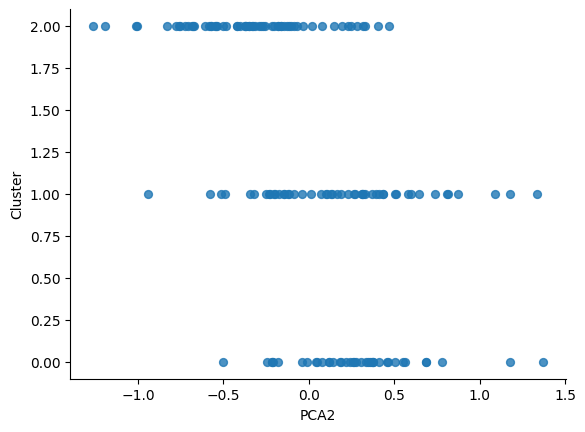

In [33]:
# Assuming X_pca_df contains your data with the 'Cluster' column
X_pca_df.plot(kind='scatter', x='PCA2', y='Cluster', s=32, alpha=.8)  # Changed dataframe to X_pca_df

plt.gca().spines[['top', 'right',]].set_visible(False)

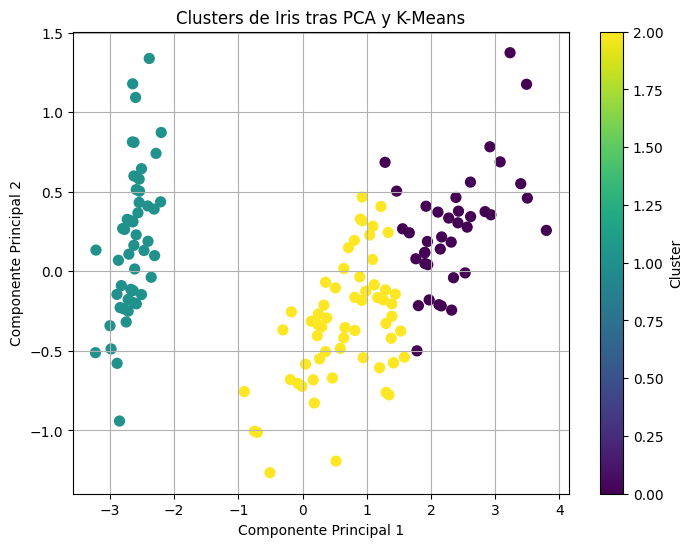

In [34]:
# Visualización de los clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca_df['PCA1'], X_pca_df['PCA2'], c=X_pca_df['Cluster'], cmap='viridis', s=50)
plt.title('Clusters de Iris tras PCA y K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

DBSCAN


In [35]:
# Import the necessary library and class
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your original data that needs to be scaled
# Replace 'X' with the actual variable name if it's different
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the data

dbscan = DBSCAN()
dbscan.fit(X_scaled)
df['Cluster'] = dbscan.labels_


In [36]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

In [37]:
df["Cluster"].value_counts().sort_index()

,count
Cluster,
-1,34
0,45
1,71


In [38]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  17,
        19,  20,  21,  23,  24,  25,  26,  27,  28,  29,  30,  31,  34,
        35,  36,  37,  38,  39,  40,  42,  43,  44,  45,  46,  47,  48,
        49,  52,  54,  55,  58,  61,  63,  64,  65,  66,  67,  69,  71,
        73,  74,  75,  77,  78,  79,  80,  81,  82,  83,  86,  88,  89,
        90,  91,  92,  94,  95,  96,  97,  99, 101, 103, 104, 110, 111,
       112, 116, 120, 123, 126, 133, 137, 138, 139, 140, 141, 142, 143,
       145, 147])

In [39]:
dbscan.fit_predict([[0,0,0]])

array([-1])

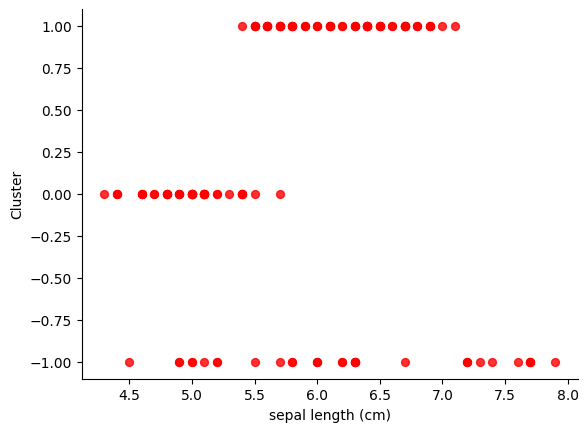

In [40]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sepal length (cm)', y='Cluster', s=32, alpha=.8, color="red")
plt.gca().spines[['top', 'right',]].set_visible(False)

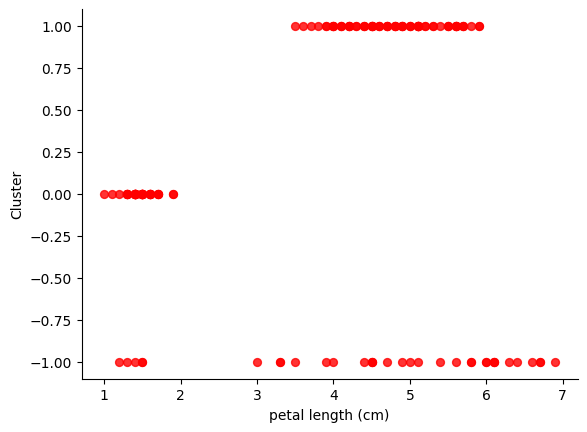

In [41]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='petal length (cm)', y='Cluster', s=32, alpha=.8, color="red")
plt.gca().spines[['top', 'right',]].set_visible(False)

Mean Shift

In [47]:
from sklearn.cluster import MeanShift

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
# Aplicar PCA para reducir a 2 componentes principales (para visualización)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [75]:
# Aplicar Mean Shift
mean_shift = MeanShift()
mean_shift.fit(X_pca)
labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_

In [80]:
# Agregar etiquetas de clusters al DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'Cluster']) # Include 'Cluster' in the columns list
#X_pca_df['Cluster'] = labels # This line is now redundant, as 'Cluster' is already in X_pca

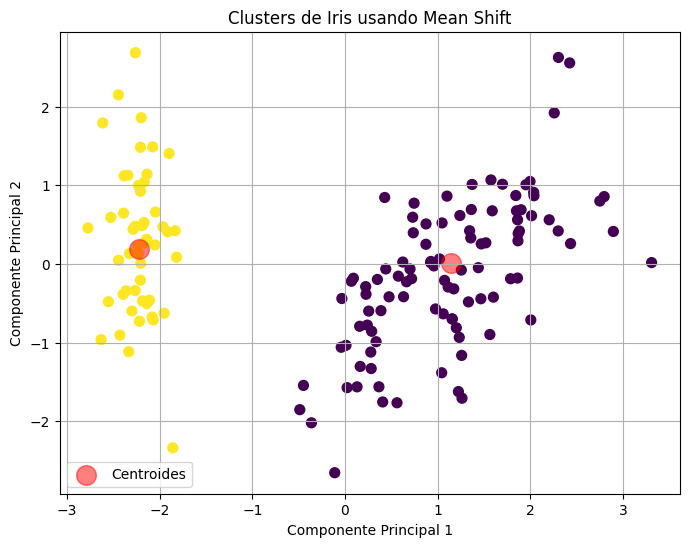

In [51]:
# Visualización de los clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca_df['PCA1'], X_pca_df['PCA2'], c=X_pca_df['Cluster'], cmap='viridis', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, alpha=0.5, label='Centroides')
plt.title('Clusters de Iris usando Mean Shift')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()


**Gaussian Mixture**

In [53]:
from sklearn.mixture import GaussianMixture

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
# Aplicar PCA para reducir a 2 componentes principales (para visualización)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [59]:
# Aplicar Gaussian Mixture
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_pca)
labels = gmm.predict(X_pca)


In [56]:
# Agregar etiquetas de clusters al DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
X_pca_df['Cluster'] = labels
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,-1


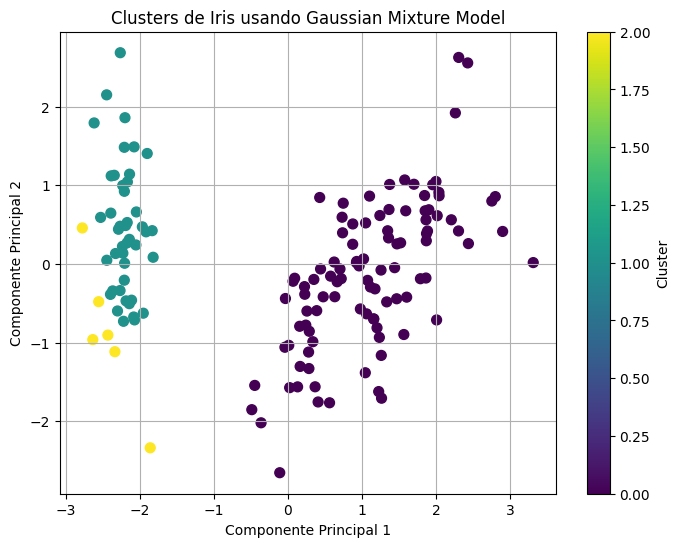

In [57]:
# Visualización de los clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca_df['PCA1'], X_pca_df['PCA2'], c=X_pca_df['Cluster'], cmap='viridis', s=50)
plt.title('Clusters de Iris usando Gaussian Mixture Model')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


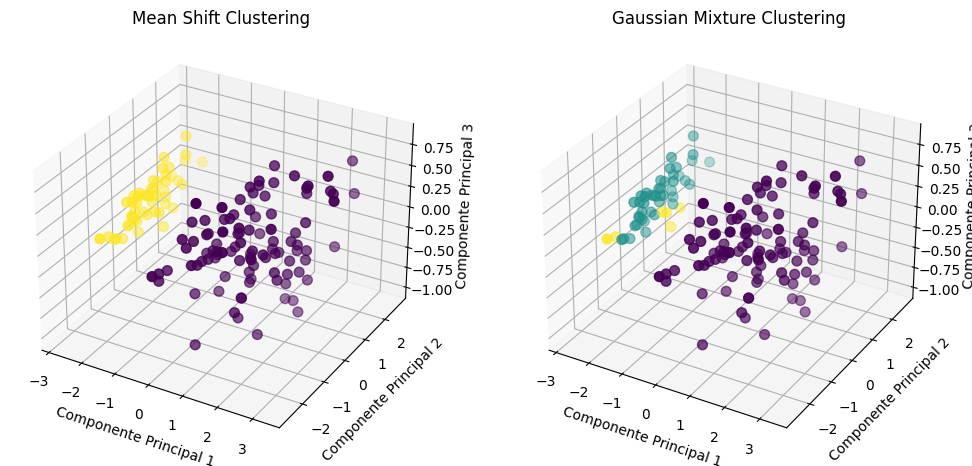

In [72]:
from mpl_toolkits.mplot3d import Axes3D

# Agrupamiento con Mean Shift
mean_shift = MeanShift()
mean_shift.fit(X_pca)
labels_ms = mean_shift.labels_

# Agrupamiento con Gaussian Mixture
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_pca)
labels_gmm = gmm.predict(X_pca)

# Visualización de los clusters en 3D con Mean Shift
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_ms, cmap='viridis', s=50)
ax.set_title('Mean Shift Clustering')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Visualización de los clusters en 3D con Gaussian Mixture
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_gmm, cmap='viridis', s=50)
ax2.set_title('Gaussian Mixture Clustering')
ax2.set_xlabel('Componente Principal 1')
ax2.set_ylabel('Componente Principal 2')
ax2.set_zlabel('Componente Principal 3')

plt.show()
